# Dataset preparation and preprocessing

   Background:
   
    At the core of our futuristic world is data! It is a essential catalyst to the 21st centuries technological revolution. This wealth will not only be utilizized to catallyze the operations of large fourtune 500 companies but, government agencies, small businesses, health companines, policy-law makers,personal decision making ,and the web of systems created tolearn from quantified beahvior and recorded characteriistics. 

    Data is like the DNA for modern day computers. Containing the instructions needed to develop, survive, and re-create. To make use of the messages(Insights) that can be found in data, a computer must use machine learning models to carry out the desired functions. Similary to DNA, data in a supervised machine learning model still must be gathered,logically structure, and grouped to provided the needed infustructure to develop an accurate model ....

" In our current society, there is no Machine learning without data. ML uses data to continously improve itself over time  this is why the quality and quanityt of data is necessary for these models to operate efficently "


## Part 1:  Data Collection


**The second stage of project implementation involves data collection, selection, preprocessing, and transformation.**

    During this phase one must set the foundation for the project and find sources to collect data and identify means of extracting data.

### This project will focus on the aggregation real estate records. 
    Determining the factors that matter and influence others is essential ti creating an efficient prediction model. The dataset was aggregated by utilizing public housing records. This data started off as unstructured text files that where translated into html text, and then transformed into a csv file.  

    When it comes to the amount of data needed to create a model it depends on the problem being solved. The general rule of thumbs is the more data available the more realiable the model can be. There is 2437 records raw uncleaned Real-Estate Data.

### The features of the finalized data set will include:
- **Address (String):** The address of the property asset
- **Listing Price (Integer):** The value in which the seller wants to sell the house price for. "Price Worth Estimate"
- **Square Footage (String):** The square footage value of the property,
- **Property Type (String):** Property Type Classification
- **Beds (Integer):** Number of Beds
- **Baths (Integer):** Number of Baths

These features where selected because they have a direct impact on the value to be predictted the "Listing Price". Though we have to acknowledge that there are more characterstics used to determine the prices of property assets. The choosen features where found across all data sources without missing values.



## Part 2: Data Cleaning


    Data cleaning is important to produce highest quality informartion to increase the overall productivity of the model. Once the Real-Estate Data was gathered from different data sources, there must be a focus on the quality of the data. 

    In order to achieve the following characteristics in the data gathered effective preprocessing steps must transform the data to be accurate, consistent, complete, valid, and Unifom.

**5 characteristics of quality data**

- **Validity.** The degree to which your data conforms to defined business rules or constraints.
- **Accuracy.** Ensure your data is close to the true values.
- **Completeness.** The degree to which all required data is known.
- **Consistency.** Ensure your data is consistent within the same dataset and/or across multiple data sets.
- **Uniformity.** The degree to which the data is specified using the same unit of measure.


### Preprocessing Steps




Step 1: Data Formatting
> In order to create a ML model there must exsist a centralized storage system to query the information from. The data in this project is stored in csvfiles.
This phase includes:
1. Taking text files and translating them into Comma Seperated Files
2. Stripping-Removing whitespaces from text
3. Fill-in missing values with null tags



```python

def Html_Attribute_Extraction(filename):
    # Opens a file to read from
       html_report = open(filename,'r') 
    # Saves contents of file into variable
       contents = html_report.read()
    # Adds contents of url/file into the soup variable         
       soup = BeautifulSoup( contents, "html.parser") #NOTE Change depending on the type of input

    # Find specific tag in file
       results = soup.find_all('div' , {'class': "item-cnt clearfix"})
       print("The number of times this Tag was found: " ,len(results))
    
    # incase of null data fields to allow for a conditional statement later
    # (if,else)
        beds=''
        baths=''
        sqft=''
        count=0

    # CREATE THE A CSV FILE TO WRITE TO
        with open('PS_O.csv', 'w', newline='', encoding='utf8') as f:
    # CREATE CSV WRITER VARIABLE
            thewriter = writer(f)

            header= ['Title', 'Beds', 'Baths', 'Square Feet', 'Property Title', 'Listing Price'] #CREATE COLUMNS FOR CSV FILE
            thewriter.writerow(header)

    # FOR THE TAG IN THE 
            for result in results:
    # GET VALUES(DATA) FROM THE DESIRED TAGS 

                #1 : ADDRESS
                title = result.find("div", class_='address-container').text.replace('\n', '').split()

                #2 : NUM OF BEDS
                beds1 = result.find("li", class_='ic-beds')#hold original ouput
                if beds1:
                    beds = beds1.text.replace('\n', '').strip()
                    #Sets the text equal to the variable that you created earlier
                else:
                    beds = 'NaN' 
                    count+=1 #count=count+1
                    #If string is empty replace it with this text  

                #3 : NUM OF BATHS
                baths1 = result.find("li", class_='ic-baths')
                if baths1:
                    baths = baths1.text.replace('\n', '').strip()
                else:
                    baths = 'NaN'
                    count+=1    

                #4 - SQFT
                sqft1 = result.find("li", class_='ic-sqft')
                if sqft1:
                    sqft = sqft1.text.replace('\n', '').strip()
                else:
                    sqft = 'NaN' 
                    count+=1     

                #5 : PROPERTY TYPE
                pType = result.find("li", class_='property-type ic-proptype').text.replace('\n', '').strip()

                #6 : ESTIMATED VALUE
                Listing = result.find("div", class_='price').text.replace('\n', '').strip()

                #Creates a list every iteration of variables found
                proprtyInfo=[title, beds, baths, sqft, pType, ListingPrice] 
                
                #Prints row to csv file
                thewriter.writerow(proprtyInfo)
        print(count)        
```

In [1]:
# HEADER NEEDED
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

In [2]:
# ORIGINAL DATA SOURCES
O_dataSource1_PS = pd.read_csv(
    "/Users/rburgess/Documents/GitHub/Webscrapping/Pricing Model Prjct/Data/PS_Original.csv")
print("Raw Data from Source 1: \n", "First 5 rows: \n", O_dataSource1_PS.head())

O_dataSource2_C = pd.read_csv(
    "/Users/rburgess/Documents/GitHub/Webscrapping/Pricing Model Prjct/Data/C_Original.csv")
print("Raw Data from Source 2: \n", "First 5 rows: \n", O_dataSource2_C.head())

O_dataSource3_M = pd.read_csv(
    "/Users/rburgess/Documents/GitHub/Webscrapping/Pricing Model Prjct/Data/M_Original.csv")
print("Raw Data from Source 3: \n", "First 5 rows: \n", O_dataSource3_M.head())



Raw Data from Source 1: 
 First 5 rows: 
                                                Title       Beds      Baths  \
0  ['11859', 'GENNARO', 'LANE,', 'Orlando,', 'FL'...  3 BedsBds  2 BathsBa   
1  ['151', 'E', 'WASHINGTON', 'STREET,', 'Orlando...  2 BedsBds  2 BathsBa   
2  ['7240', 'WESTPOINTE', 'BOULEVARD,', 'Orlando,...  3 BedsBds  2 BathsBa   
3  ['100', 'S', 'EOLA', 'DRIVE,', 'Orlando,', 'FL...  3 BedsBds  3 BathsBa   
4  ['3446', 'SOHO', 'STREET,', 'Orlando,', 'FL', ...  2 BedsBds  2 BathsBa   

      Square Feet Property Title Listing Price  
0  2,005 SqftSqft    Residential  $649,000 USD  
1  1,785 SqftSqft    Residential  $499,000 USD  
2  1,423 SqftSqft    Residential  $240,000 USD  
3  2,475 SqftSqft    Residential  $750,000 USD  
4  1,107 SqftSqft    Residential  $229,900 USD  
Raw Data from Source 2: 
 First 5 rows: 
                                              Address    Beds    Baths  \
0  ['1808', 'S', 'Bumby', 'Avenue', 'Orlando', 'F...  3 beds  2 baths   
1  ['84


Step 1: Fix structural errors
> After the data is properly formatted. The data is checked for errors, typos, and any structural related errors such as deleting any extra wording

> The removal of the unnecessary wording was manually done in the file instead of altering the text via code. 



In [3]:
# FINAL DATA SOURCE
missing_values = ["N/A", "NaN"]
dataSource1 = pd.read_csv(
    "/Users/rburgess/Documents/GitHub/Webscrapping/Pricing Model Prjct/Data/DS1_Cleaned.csv", na_values=missing_values)
print("Clean Data from Source 1: \n", dataSource1.head(2))
print("\nDataset 1 Data Types : \n",cl(dataSource1.dtypes, attrs = ['bold']))

print('\nNumber of Rows: ',len(dataSource1))

#CHECK NULLS
print("\nNull Check: \n",dataSource1.isnull().sum()) # FOR EACH COLUMN



Clean Data from Source 1: 
                                              Address  Beds  Baths  \
0  ['1808','S','Bumby','Avenue','Orlando','FL','3...     3    2.0   
1  ['8429','Leeland','Archer','Blvd','Orlando','F...     4    3.0   

   Square Feet Property Type  Listing Price  
0         1246   Residential         450000  
1         1512   Residential         425000  

Dataset 1 Data Types : 
 Address           object
Beds               int64
Baths            float64
Square Feet        int64
Property Type     object
Listing Price      int64
dtype: object

Number of Rows:  2312

Null Check: 
 Address          0
Beds             0
Baths            0
Square Feet      0
Property Type    0
Listing Price    0
dtype: int64



Step 2: Remove duplicate or irrelevant observations
> Including the same data in a dataset does not add to overall outcome of the dataset. The variety of the data provided allows for the model to account for a broad range of outcomes. The Dataset will be checked for any repeating values.


In [4]:
#UNCOMMENT: Identify Duplicate Rows
 # duplicate = O_dataSource1_PS[O_dataSource1_PS.duplicated()]
 # print("Duplicate Rows :", duplicate)

#Drop Deuplicates
dataSource1.drop_duplicates(subset=["Address"], keep="last", inplace=True)
print('\nNumber of Rows: ',len(dataSource1))


Number of Rows:  2262




Step 2: Handle missing data
> This step account for the data fields that do not have any values, also known as null values.


In [5]:
# DROP NULL VALUES
dataSource1.dropna(inplace=True)

# CHECK IF NULL VALUES ARE DROPPED
print("Null Values Per Row DS1: \n",dataSource1.isnull().sum())

Null Values Per Row DS1: 
 Address          0
Beds             0
Baths            0
Square Feet      0
Property Type    0
Listing Price    0
dtype: int64


Step 3: Format Data
> This includes Editing the data types 

In [6]:
# FORMATTING COLUMN DATA TYPES
dataSource1 = dataSource1.astype({'Beds':'int', 'Baths':'int','Square Feet': 'int','Property Type': 'string','Listing Price': 'int'})
#dataSource2 = dataSource2.astype({'Beds':'int', 'Baths':'int','Square Feet': 'int','Property Type': 'string','Listing Price': 'int'})

print("Dataset 1 Data Types : \n",cl(dataSource1.dtypes, attrs = ['bold']))
#print("Dataset 2 Data Types : \n",cl(dataSource2.dtypes, attrs = ['bold']))

Dataset 1 Data Types : 
 Address          object
Beds              int64
Baths             int64
Square Feet       int64
Property Type    string
Listing Price     int64
dtype: object


In [7]:
# Describe function we can get a statistical view of the data like mean, median, standard deviation, and so on.
dataSource1.describe()

,Beds,Baths,Square Feet,Listing Price
count,2262.000000,2262.000000,2262.000000,2.262000e+03
mean,3.163130,2.512378,1942.319629,5.238996e+05
std,1.113784,1.020609,1000.746986,4.220764e+05
min,1.000000,1.000000,408.000000,6.500000e+04
25%,2.000000,2.000000,1200.000000,2.650000e+05
50%,3.000000,2.000000,1690.000000,4.297650e+05
75%,4.000000,3.000000,2476.000000,6.506750e+05
max,8.000000,7.000000,11923.000000,6.995000e+06


Ref
https://prinsli.com/internal-data/ : Public Data
https://www.tableau.com/learn/articles/what-is-data-cleaning : FIG2

## Data Exploratory Anaylsis

In [8]:
print(dataSource1['Listing Price'].max())

6995000


/var/folders/79/m3ld0_jn5hj7qffc4bwddrc80000gn/T/ipykernel_3609/1112703645.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(dataSource1.corr(), annot = True, cmap = 'magma')


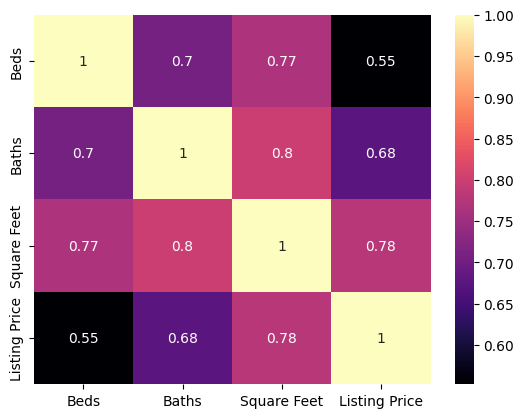

In [9]:
'''
HEATMAPS ALLOW YOU TO FIND RELATION BETWEEMN TWO VARIABLES IN A DATASET
'''

sb.heatmap(dataSource1.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()


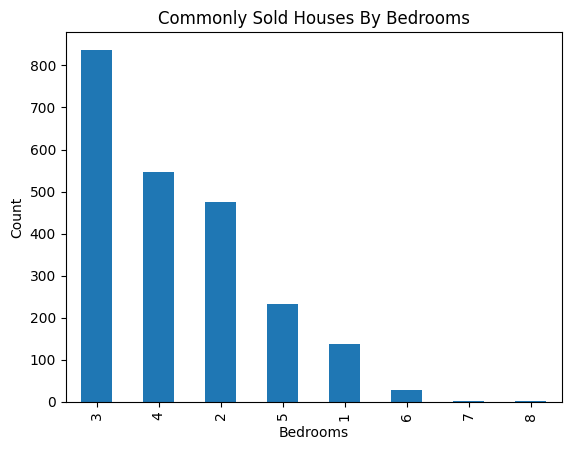

<Figure size 640x480 with 0 Axes>

In [10]:
'''
This graph shows the number of houses in the dataset compared to the frequency of bedrooms they have. 
Further allow us to see that homes with 3 bedrooms are more favorable (sold more) than any other amount. We can also see that there are less home sales with 5 plus bedrooms or simply 1 bedroom. 
Proving that these houses are less common or less frequent built by developers.
'''

dataSource1['Beds'].value_counts().plot(kind='bar')
plt.title('Commonly Sold Houses By Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()
plt.savefig('PriceVsBedrooms.png')

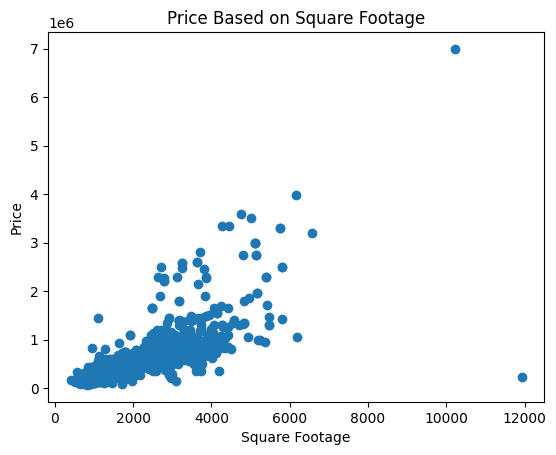

<Figure size 640x480 with 0 Axes>

In [11]:
'''
THIS GRAPH SHOWS HOUSE PRICES COMPARED TO THEIR SQUARE FOOTAGE.
FROM THIS CHART WE OBSERVE THAT THERE ARE MORE HOMES THAT HAVEE LESS THAN 
4000 SQFT THEN GREATER THAN 4000. IT FURTHER CONFIRMS THAT AS THE SQFT INCREASES SO DOES THE AMOUNT OF THE HOUSE
EXCEPT FOR A OUTLIERS. THERE EXSIT SOME HOMES WITH LESS SQUARE FEET THAT COST MORE
AND THOSE WITH MORE SQUARE FOOTAGE AND THIS CAN BE DUE TO CHARACTERISTICS(E.G., RENNOVATIONS, AREA, ADMENITIES, AND ETC)
THAT ARE NOT INCLUDED IN THIS DATASET. 
'''
#dataSource1['Beds'].value_counts().plot(kind='(bar')
plt.scatter(dataSource1["Square Feet"],dataSource1["Listing Price"])
plt.title('Price Based on Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()
plt.savefig('PriceVsSQFT.png')

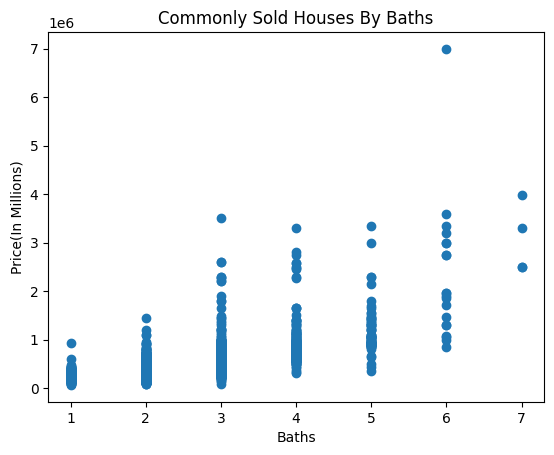

' DS2\nplt.scatter(dataSource2["Baths"],dataSource2["Listing Price"])\nplt.title(\'Commonly Sold Houses By Baths\')\nplt.xlabel(\'Baths\')\nplt.ylabel(\'Price(In Millions)\')\nplt.show()\n'

<Figure size 640x480 with 0 Axes>

In [12]:
'''
THIS GRAPH SHOWS HOUSES PRICES COMPARED TO THE AMOUNT OF BEDROOMS THEY HAVE.
FROM THIS CHART WE CAN SEE THAT HOMES WITH 3 BEDROOMS ARE MORE 
FAVORABLE(SOLD MORE) THEN ANY AMOUNT. WE CAN ALSO SEE THERE IS LESS HOME SALES 
WITH 1 BEDROOMS OR 5 PLUS BEDROOMS. WE CAN FURTHER CONCLUDE THAT ALL HOUSES WITH 
6 BATHROOMS THE PRICE GREATER THAN 1 MILLION DOLLARS. THERE IS ALSO AN HIGHER 
DENSITY OF HOUSES WITH 3 BEDROOMS WITH MOST HOUSES FALLING UNDER 1.5 MILLION DOLLARS.
'''

plt.scatter(dataSource1["Baths"],dataSource1["Listing Price"])
plt.title('Commonly Sold Houses By Baths')
plt.xlabel('Baths')
plt.ylabel('Price(In Millions)')
plt.show()
plt.savefig('PriceVsBaths.png')

''' DS2
plt.scatter(dataSource2["Baths"],dataSource2["Listing Price"])
plt.title('Commonly Sold Houses By Baths')
plt.xlabel('Baths')
plt.ylabel('Price(In Millions)')
plt.show()
'''

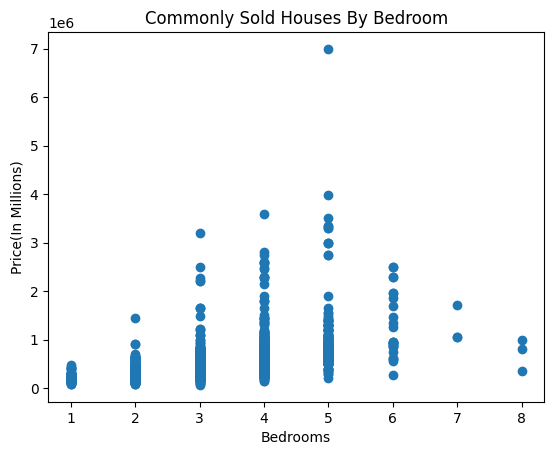

'DS2\nplt.scatter(dataSource2["Beds"],dataSource2["Listing Price"] )\nplt.title(\'Commonly Sold Houses By Bedroom\')\nplt.xlabel(\'Bedrooms\')\nplt.ylabel(\'Price(In Millions)\')\nplt.show()'

<Figure size 640x480 with 0 Axes>

In [13]:
#dataSource1['Beds'].value_counts().plot(kind='(bar')
plt.scatter(dataSource1["Beds"],dataSource1["Listing Price"] )
plt.title('Commonly Sold Houses By Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Price(In Millions)')
plt.show()
plt.savefig('PriceVsBedroomsScatter.png')

'''DS2
plt.scatter(dataSource2["Beds"],dataSource2["Listing Price"] )
plt.title('Commonly Sold Houses By Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Price(In Millions)')
plt.show()'''
#ax1 = dataSource1.plot.scatter(x= 'Listing Price', y='Beds', c='')

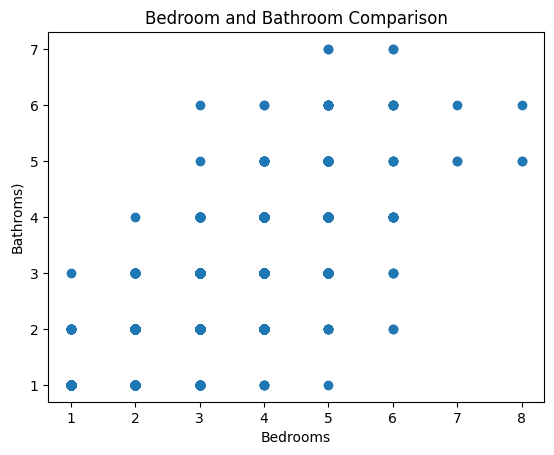

<Figure size 640x480 with 0 Axes>

In [14]:
plt.scatter(dataSource1["Beds"],dataSource1["Baths"] )
plt.title('Bedroom and Bathroom Comparison')
plt.xlabel('Bedrooms')
plt.ylabel('Bathroms)')
plt.show()
plt.savefig('BedroomsVsBathrooms.png')

/opt/homebrew/lib/python3.10/site-packages/seaborn-0.11.2-py3.10.egg/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


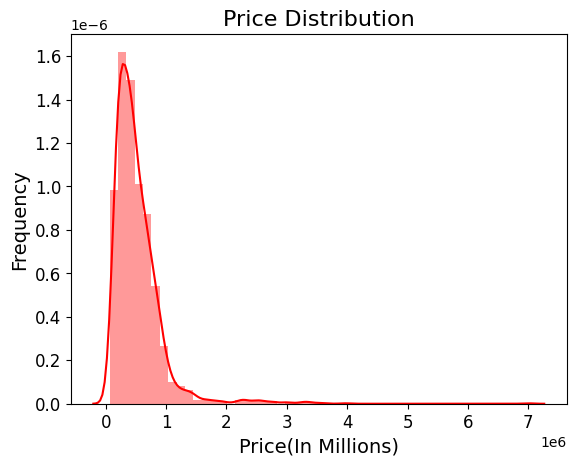

In [15]:
'''
THIS CHART SHOWS THE THE DISTRIBUTION OF THE HOUSE PRICES IN THE DATA SET.
'''

# 3. Distribution plot

sb.distplot(dataSource1['Listing Price'], color = 'r')
plt.title('Price Distribution', fontsize = 16)
plt.xlabel('Price(In Millions)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()